<a href="https://colab.research.google.com/github/fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/blob/main/Data_exploration_Curitiba_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages 

In [60]:
%%capture
!pip install geopandas
!pip install outlier-removal-101703289
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from outlier_removal.outlier import remove_outlier
!pip install unidecode
import unidecode

In [61]:
%%capture
!pip install plotly --upgrade
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly as py
#import plotly.figure_factory as ff
from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Import data 

In [129]:
url = 'https://raw.githubusercontent.com/fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/main/data_mercado_livre_ap_curitiba_rent.csv'
da_ml = pd.read_csv(url)
#da_ml = pd.read_csv('dados_mercado_livre_curitiba.csv')

In [63]:
!wget 'http://ippuc.org.br/geodownloads/SHAPES/DIVISA_DE_BAIRROS.zip'
!unzip '/content/DIVISA_DE_BAIRROS.zip'

--2021-02-03 14:37:28--  http://ippuc.org.br/geodownloads/SHAPES/DIVISA_DE_BAIRROS.zip
Resolving ippuc.org.br (ippuc.org.br)... 201.11.35.17
Connecting to ippuc.org.br (ippuc.org.br)|201.11.35.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337191 (329K) [application/x-zip-compressed]
Saving to: ‘DIVISA_DE_BAIRROS.zip.3’

DIVISA_DE_BAIRROS.z 100%[===================>] 329.29K   258KB/s    in 1.3s    

2021-02-03 14:37:30 (258 KB/s) - ‘DIVISA_DE_BAIRROS.zip.3’ saved [337191/337191]

Archive:  /content/DIVISA_DE_BAIRROS.zip
replace DIVISA_DE_BAIRROS.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DIVISA_DE_BAIRROS.shx   
  inflating: DIVISA_DE_BAIRROS.dbf   
  inflating: DIVISA_DE_BAIRROS.prj   
  inflating: DIVISA_DE_BAIRROS.sbn   
  inflating: DIVISA_DE_BAIRROS.sbx   
  inflating: DIVISA_DE_BAIRROS.shp   


# Filtering data 

In [142]:
da_ml = remove_outlier(da_ml)

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning:

invalid value encountered in less



In [65]:
pd.options.display.float_format = "{:.2f}".format

In [143]:
da_ml.replace(',','.', regex=True,inplace=True)
da_ml['areas'] = da_ml['areas'].astype(float)

# Data exploration

In [144]:
da_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,811.00,1303.43,615.21,2.00,850.00,1170.00,1600.00,3250.00
quartos,789.00,1.89,0.84,1.00,1.00,2.00,3.00,5.00
areas,802.00,64.75,49.11,17.00,37.00,53.00,74.00,801.00


In [145]:
indexNames = da_ml[da_ml['areas'] >= 350].index

In [147]:
da_ml.drop(indexNames , inplace=True)

In [149]:
da_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,808.00,1298.97,611.47,2.00,850.00,1160.00,1600.00,3250.00
quartos,786.00,1.88,0.84,1.00,1.00,2.00,3.00,5.00
areas,799.00,62.99,38.08,17.00,37.00,53.00,73.50,300.00


In [150]:
da_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 915
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   799 non-null    object 
 1   precos   808 non-null    float64
 2   quartos  786 non-null    float64
 3   areas    799 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.6+ KB


In [151]:
da_ml.isnull().sum()

bairro      9
precos      0
quartos    22
areas       9
dtype: int64

In [152]:
da_ml['bairro'].value_counts()

Reboucas             46
Centro               44
Cidade-Industrial    41
Bigorrilho           39
Cristo-Rei           39
                     ..
Champagnat            1
Parolin               1
Bom-Retiro            1
Cachoeira             1
Campo-de-Santana      1
Name: bairro, Length: 62, dtype: int64

In [153]:
da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

,precos,quartos,areas
bairro,,,
Champagnat,2800.00,3.00,193.00
Bigorrilho,2300.00,2.00,67.00
Capao-da-Imbuia,2137.50,3.50,157.00
Jardim-das-Americas,1950.00,1.50,86.00
Batel,1900.00,2.00,88.00
...,...,...,...
Cachoeira,750.00,2.00,45.00
Sao-Lourenco,725.00,1.50,50.00
Tatuquara,675.00,2.00,47.00


In [154]:
da_group = da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

In [162]:
fig = make_subplots(rows=2, cols=2)
preços = go.Histogram(x=da_ml['precos'], name="preços")
quartos = go.Histogram(x=da_ml['quartos'], name="quartos")
áreas = go.Histogram(x=da_ml['areas'], name="áreas")

fig.append_trace(preços, 1, 1)
fig.append_trace(quartos, 1, 2)
fig.append_trace(áreas, 2, 1)
fig.show()

In [167]:
px.scatter(data_frame=da_ml, x="precos", y="areas")

In [165]:
px.box(data_frame=da_ml, x="quartos", y="areas")

In [168]:
px.box(data_frame=da_ml, x="quartos", y="precos")

In [ ]:
da_price = da_group.drop('quartos', 1).drop('areas', 1).reset_index()
da_price['bairro'] = da_price['bairro'].str.capitalize().apply(unidecode.unidecode).replace('-', ' ', regex=True)

In [176]:
da_areas_precos = da_group.drop('quartos', 1).reset_index()
da_areas_precos['bairro'] = da_areas_precos['bairro'].str.capitalize().apply(unidecode.unidecode).replace('-', ' ', regex=True)

In [177]:
px.scatter(data_frame=da_areas_precos, x="precos", y="bairro", color='areas')

In [171]:
da_price

,bairro,precos
0,Champagnat,2800.00
1,Bigorrilho,2300.00
2,Capao da imbuia,2137.50
3,Jardim das americas,1950.00
4,Batel,1945.00
...,...,...
57,Cachoeira,750.00
58,Sao lourenco,725.00
59,Tatuquara,675.00
60,Sitio cercado,616.00


In [170]:
da_group

,precos,quartos,areas
bairro,,,
Champagnat,2800.00,3.00,193.00
Bigorrilho,2300.00,2.00,67.00
Capao-da-Imbuia,2137.50,3.50,157.00
Jardim-das-Americas,1950.00,1.50,86.00
Batel,1900.00,2.00,88.00
...,...,...,...
Cachoeira,750.00,2.00,45.00
Sao-Lourenco,725.00,1.50,50.00
Tatuquara,675.00,2.00,47.00


In [166]:
correlations = da_ml.corr()
fig = px.imshow(correlations, labels=dict(color="Correlação"), title="Correlation between numerical variables")
#fig.update_layout(width=800, height=800)
fig.show()

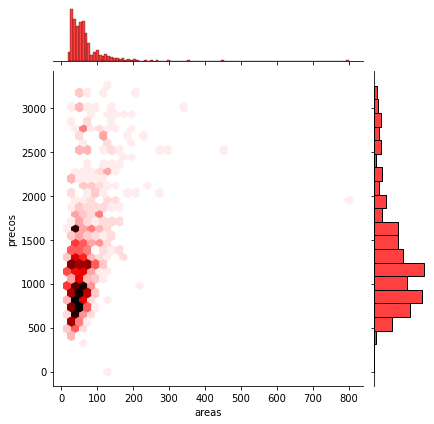

In [79]:
sns.jointplot(x="areas", y="precos", data=da_ml, kind="hex", color="r");

In [83]:
da_ml

,bairro,precos,quartos,areas
0,Abranches,2500.00,2.00,80.00
1,Abranches,2100.00,2.00,65.00
2,Abranches,2500.00,2.00,80.00
3,Abranches,2100.00,2.00,65.00
4,Abranches,600.00,1.00,35.00
...,...,...,...,...
911,Agua-Verde,1500.00,1.00,46.00
912,Agua-Verde,1200.00,1.00,29.00
913,Agua-Verde,1230.00,1.00,31.00
914,Agua-Verde,1500.00,1.00,30.00


In [84]:
#da_ml.to_csv('data_rent_ap_curitiba_mercado_livre.csv')

In [85]:
da_group.head()

,precos,quartos,areas
bairro,,,
Champagnat,2800.00,3.00,193.00
Bigorrilho,2300.00,2.00,67.00
Capao-da-Imbuia,2137.50,3.50,157.00
Jardim-das-Americas,1950.00,1.50,86.00
Batel,1945.00,2.00,89.50


In [100]:
#da_price = da_group.drop('quartos', 1).drop('areas', 1).reset_index()

In [106]:
#da_price['bairro'] = da_price['bairro'].str.capitalize().apply(unidecode.unidecode).replace('-', ' ', regex=True)

geo files 

In [108]:
db = gpd.read_file('DIVISA_DE_BAIRROS.shp')

In [109]:
db.head()

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry
0,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7..."
1,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7..."
2,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7..."
3,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7..."
4,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7..."


In [110]:
db['bairro'] = db['NOME'].str.capitalize().apply(unidecode.unidecode)

In [111]:
db['bairro'].head()

0             Agua verde
1          Jardim social
2                  Xaxim
3    Jardim das americas
4                 Guaira
Name: bairro, dtype: object

In [112]:
db['bairro'] = db['bairro'].replace('Cidade industrial de curitiba', 'Cidade industrial')

In [113]:
merged = db.set_index('bairro').join(da_price.set_index('bairro'))
merged = merged.reset_index()
#merged = merged.fillna(0)

In [114]:
merged['precos'] = merged['precos'].fillna(merged.groupby('NM_REGIONA')['precos'].transform('median'))

In [115]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Agua verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1500.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1300.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",980.00
3,Jardim das americas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",1950.00
4,Guaira,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1200.00


In [116]:
 merged.groupby(['bairro']).median().sort_values('precos', ascending=True)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
bairro,,,,,,
Guabirotuba,6,23.00,3.00,2654431.08,6576.16,450.00
Umbara,50,73.00,10.00,22449467.55,26556.82,616.00
Sitio cercado,51,65.00,10.00,11199570.52,14105.87,616.00
Ganchinho,53,72.00,10.00,11359302.45,22063.15,616.00
Tatuquara,49,74.00,12.00,11234800.38,21895.61,675.00
...,...,...,...,...,...,...
Vila izabel,11,28.00,7.00,1216541.77,4590.33,1745.00
Batel,39,10.00,1.00,1737732.42,5622.22,1945.00
Jardim das americas,5,22.00,3.00,3859033.54,8818.50,1950.00


In [117]:
 merged.groupby(['NM_REGIONA']).median().sort_values('precos', ascending=False)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
NM_REGIONA,,,,,,
REGIONAL MATRIZ,23.50,10.50,1.00,1876561.14,6225.21,1475.00
REGIONAL CAJURU,30.00,21.50,3.00,4014396.44,9308.81,1250.00
REGIONAL SANTA FELICIDADE,69.00,48.00,5.00,3512540.74,10446.54,1200.00
REGIONAL PORTÃO,10.50,27.50,7.00,2284859.19,6949.10,1089.00
REGIONAL BOA VISTA,48.50,49.50,4.00,4237817.97,11098.51,1047.50
REGIONAL CIC,44.50,68.50,11.00,8355042.00,18813.55,950.00
REGIONAL PINHEIRINHO,28.00,41.00,8.00,5049840.13,11816.64,940.00
REGIONAL BOQUEIRÃO,34.00,56.50,2.00,10536322.74,16155.39,843.75
REGIONAL SANTA FELICIDADE / REGIONAL PORTÃO,33.00,44.00,5.00,8569837.61,16637.62,800.00


In [118]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Agua verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1500.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1300.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",980.00
3,Jardim das americas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",1950.00
4,Guaira,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1200.00


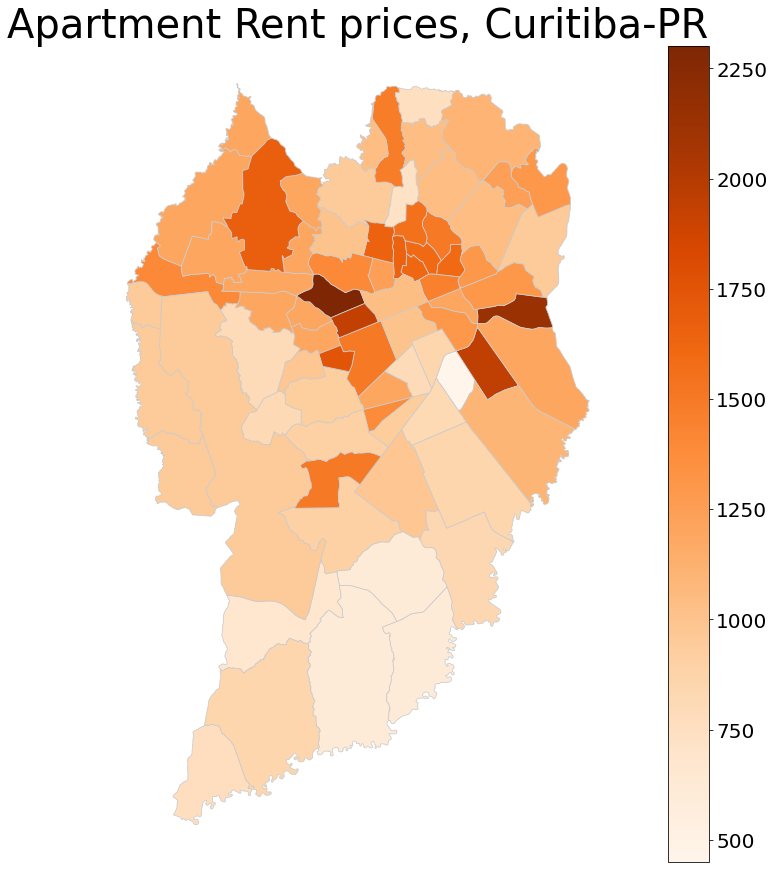

In [120]:
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.axis('off')
ax.set_title('Apartment Rent prices, Curitiba-PR', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 450, 2300
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('precos', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))